# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [44]:
! git clone https://www.github.com/cn5dwt/assignment2



fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about data tidying which is an important part of data cleaning. Data tidying is important because it is easy to tidy messy data. This paper dives into the application of data tidying, its structure, and tidy tools.

2. The tidy data standard is intended to facilitate initial exploration and reanalysis of the data, and to simplify the development of data analysis tools that work well together.

3. The first sentence means that tidy datasets are all similar in the way that it offers a standardized wat to link the structure and thus share commonalities. Messy datasets are all unique in the way that they all have different complications to work through to tidy them, or not all messy datasets are messy in the same way. The second sentence explains that by looking at datasets, it is easy to define figure out which are variables since they are organized by columns and what are observations since they are organized by rows. However, it is difficult to precisely define these observations and variables because these can linked together, making it difficult to define and separate. Wickham uses the example of height and width which could be considered as values of a dimension variable.

4. Values: What a dataset is comprised of, can be numbers/quantitative or strings/qualitative.
  
  Variable: contains all values that measure the same underlying attribute across units.

 Observation contains all values measured on
the same unit across attributes.

5. Tidy data is defined as a standard way of mapping the meaning of a dataset into its structure. There are three requirements for tidy data, (1) Each variable forms a column, (2) each observation forms a row, and (3) each type of observational unit forms a table.

6. The 5 most common problems with messy datasets are:
  1.  Column headers are values, not variable names.
  2. Multiple variables are stored in one column.
  3. Variables are stored in both rows and columns.
  4. Multiple types of observational units are stored in the same table.
  5. A single observational unit is stored in multiple tables.

  The data in table 4 are messy because columns need to be converted into rows and headers need to be created. For example, the values for income are a row instead of a column and the frequency values need be organized into one column. This problem can be fixed by "melting" the dataset, by turning the columns into rows.

7. Table 11 is messy because there is a column for each day thus not having variables as columns and observations as rows. There is also a lot of missing data. Table 12a is molten because the days columns in table 11 have been reduced to 1 date column which put changes the days of the month columns into rows. Table 12b is tidy because the element column has been split into 2 columns: tmax and tmin.

8. The chicken-and-egg problem with focusing on tidy data is considering if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. Wickham hopes that future analysts will continue to build upon the tidy data framework and develop even better data storage strategies and better tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [45]:
import pandas as pd
import numpy as np
#1
abnb = pd.read_csv("assignment2/data/airbnb_hw.csv")
abnb['Price'] = abnb['Price'].str.replace('\,', '', regex=True)
abnb['Price'] = pd.to_numeric(abnb['Price'])
abnb = abnb.sort_values("Price")
print(sum(pd.isna(abnb['Price'])))
#0 Missing values
abnb.tail(10)

0


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4003,1177497,9/18/2011,Photography Location,Brooklyn,House,100.0,Entire home/apt,11205.0,5.0,1,3,4500,100.0
3483,904192,8/1/2011,SOHO PENTHOUSE W/ PRIVATE ROOFDECK,Manhattan,Apartment,NaN,Entire home/apt,10012.0,3.0,1,0,4750,NaN
24136,23564279,11/10/2014,Breathtaking 2-Story Soho Penthouse,Manhattan,Apartment,NaN,Entire home/apt,10013.0,3.0,1,0,5000,NaN
1275,213266,8/26/2010,Beautiful 1 Bedroom in Nolita/Soho,Manhattan,Apartment,75.0,Entire home/apt,10012.0,2.0,1,2,5000,76.0
7550,2675644,6/18/2012,Turn of the Century Film Location,Staten Island,House,40.0,Entire home/apt,10301.0,12.0,1,1,5000,40.0
15633,9056494,9/25/2013,Super football SB weekend deal.,Manhattan,Apartment,NaN,Entire home/apt,10040.0,2.0,1,0,5000,NaN
2405,496780,4/9/2011,test listing which is not real,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,5.0,1,0,5999,NaN
17900,11598359,1/24/2014,SUPER BOWL Brooklyn Duplex Apt!!,Brooklyn,Apartment,NaN,Entire home/apt,11238.0,4.0,1,0,6500,NaN
4002,1177497,9/18/2011,Film Location,Brooklyn,House,NaN,Entire home/apt,11205.0,5.0,1,0,8000,NaN
23927,23248648,11/2/2014,NO LONGER BOOKING RESERVATIONS,Manhattan,Apartment,95.0,Entire home/apt,10025.0,2.0,1,21,10000,95.0


In [46]:
#2
sharks = pd.read_csv("assignment2/data/sharks.csv")
print(sharks["Type"].unique())
# Replace similar types such as Boating and Boat and Unverified and Unconfirmed
sharks['Type'] = sharks['Type'].replace({'Boat': 'Watercraft', 'Boating': 'Watercraft', 'Boatomg': 'Watercraft', 'Sea Disaster': 'Watercraft', 'Questionable': 'Unconfirmed', 'Under investigation': 'Unconfirmed', 'Invalid': 'Unconfirmed', 'Unverified': 'Unconfirmed'} )
sharks['Type'] = sharks['Type'].fillna('Unconfirmed')
print(sharks["Type"].unique())

sharks.head(10)


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
['Unprovoked' 'Provoked' 'Unconfirmed' 'Watercraft']


<ipython-input-46-edadb84b3830>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv("assignment2/data/sharks.csv")


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,Hans-Peter Malten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2020.01.07,07-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Miah Holmes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2020.01.05,05-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,Cull Island / Esperance,Scuba diving,Gary Johnson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2020.01.03,03-Jan-2020,2020.0,Unprovoked,NEW CALEDONIA,NaN,Calana,NaN,Peter ___,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2020.01.02,02-Jan-2020,2020.0,Unconfirmed,AUSTRALIA,Western Australia,Esperance,Swimming after being swept off rocks,Eric Birighitti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

In [48]:
#3
pretrial['WhetherDefendantWasReleasedPretrial'].head()
pretrial['WhetherDefendantWasReleasedPretrial'] = pretrial['WhetherDefendantWasReleasedPretrial'].replace(' ',np.nan)
pretrial.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [49]:
#4

pretrial.loc[pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9,'ImposedSentenceAllChargeInContactEvent' ] =np.nan # missing

pretrial.loc[pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1,'ImposedSentenceAllChargeInContactEvent' ] = 6 # putting all "up to 12 months" as 6 months
pretrial.loc[pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 2,'ImposedSentenceAllChargeInContactEvent' ] = 18 # putting all "1 year or more" as 1.5 years
pretrial.loc[pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0,'ImposedSentenceAllChargeInContactEvent' ] = 0 # probation/no sentence = 0
pretrial.loc[pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4,'ImposedSentenceAllChargeInContactEvent' ] = 0 # putting all deferred/pending as 0

print(pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts(),'\n')
pd.crosstab(pretrial['ImposedSentenceAllChargeInContactEvent'], pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'])


0     17499
6      4299
18      914
Name: ImposedSentenceAllChargeInContactEvent, dtype: int64 



SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4
ImposedSentenceAllChargeInContactEvent,,,,
0,8720,0,0,8779
6,0,4299,0,0
18,0,0,914,0


In [50]:

print(pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts(),'\n')
pd.crosstab(pretrial['ImposedSentenceAllChargeInContactEvent'], pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'])




0     17499
6      4299
18      914
Name: ImposedSentenceAllChargeInContactEvent, dtype: int64 



SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4
ImposedSentenceAllChargeInContactEvent,,,,
0,8720,0,0,8779
6,0,4299,0,0
18,0,0,914,0


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [51]:
ccdata = pd.read_csv("assignment2/data/college_completion.csv")

In [52]:
ccdata.shape # the dimensions of the dataset is 3798 rows/observations by 63 columns/variables
ccdata.head() # there are 63 variables included such as index, unitid, chronname, city, state, etc.

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [53]:
pd.crosstab(ccdata['control'],ccdata['level'])
# there are more private-for-profit and private-not-for-profit for 4 year and more public for 2 year. Private-for-profit
# is the most evenly distributed while private-not-for-profit is highly skewed towards 4 year.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


In [54]:
import seaborn as sns

<Axes: xlabel='grad_100_value', ylabel='Count'>

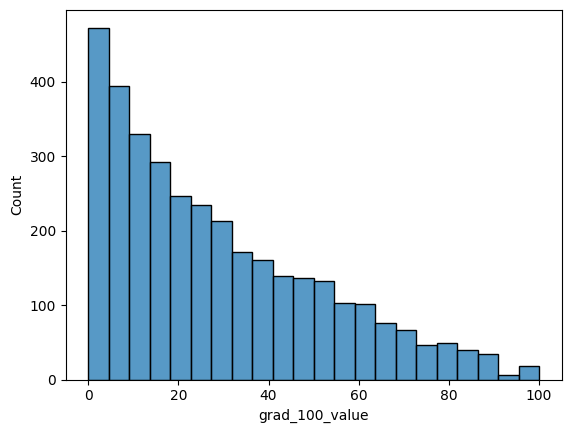

In [55]:
sns.histplot(ccdata['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

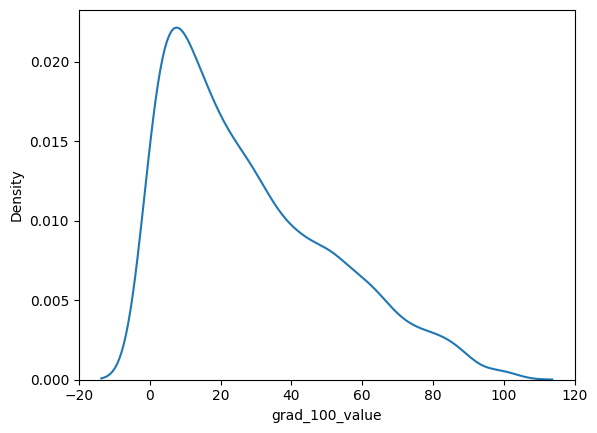

In [56]:
sns.kdeplot(ccdata['grad_100_value'])

<Axes: >

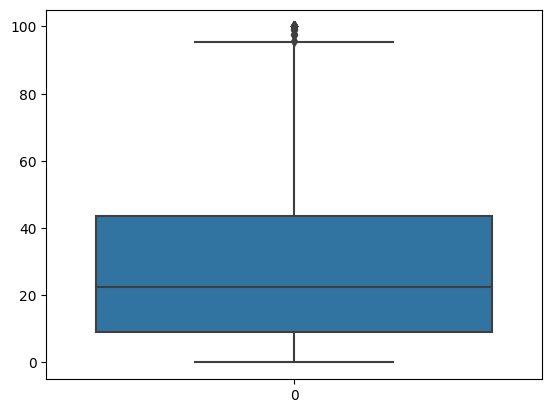

In [57]:
sns.boxplot(ccdata['grad_100_value'])

In [58]:
ccdata['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

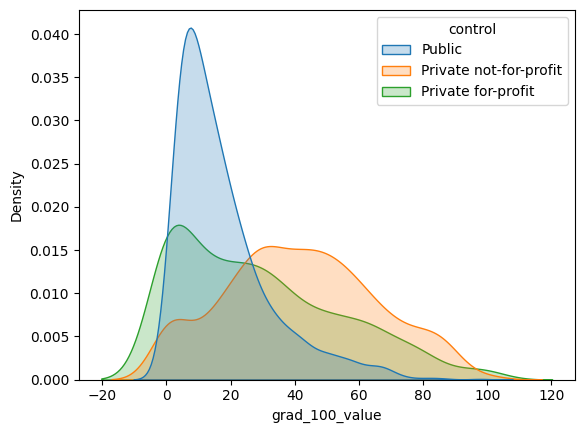

In [59]:
sns.kdeplot(data=ccdata, x="grad_100_value", hue="control", common_norm=False, fill=True)


<Axes: xlabel='grad_100_value', ylabel='Density'>

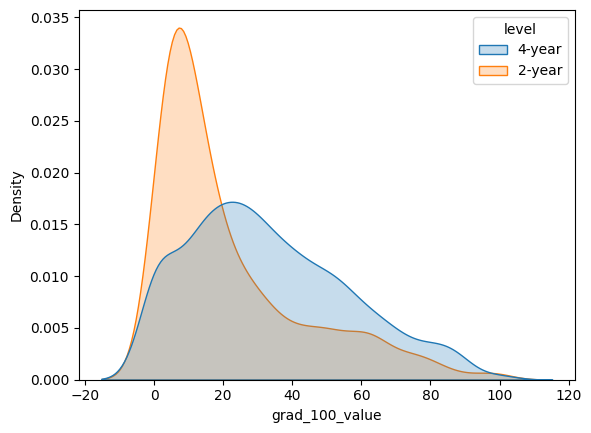

In [60]:
sns.kdeplot(data=ccdata, x="grad_100_value", hue="level", common_norm=False, fill=True)


<Axes: xlabel='grad_100_value', ylabel='Density'>

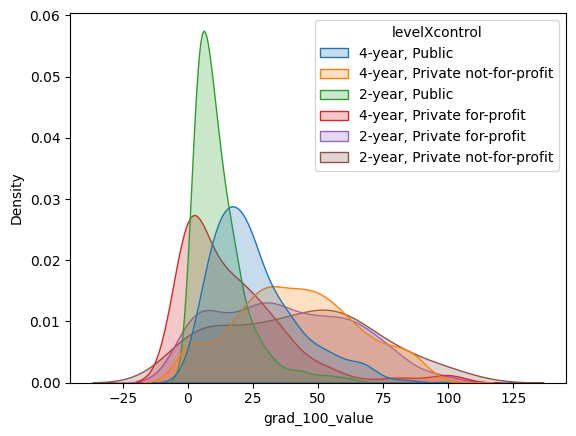

In [61]:
ccdata['levelXcontrol']=ccdata['level']+', '+ccdata['control']
sns.kdeplot(data=ccdata, x="grad_100_value", hue="levelXcontrol", common_norm=False, fill=True)


<Axes: xlabel='aid_value', ylabel='Density'>

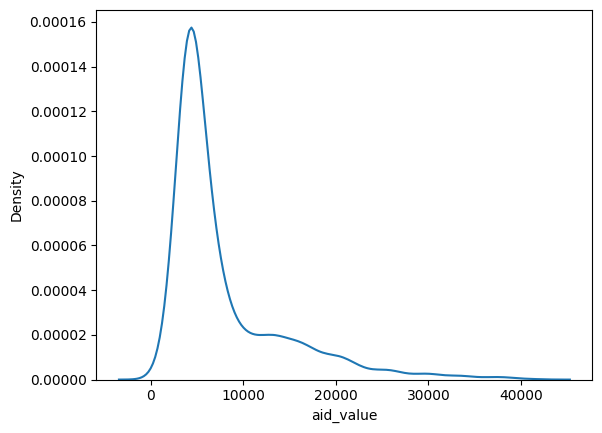

In [62]:
sns.kdeplot(data=ccdata, x="aid_value")


<Axes: xlabel='aid_value', ylabel='Density'>

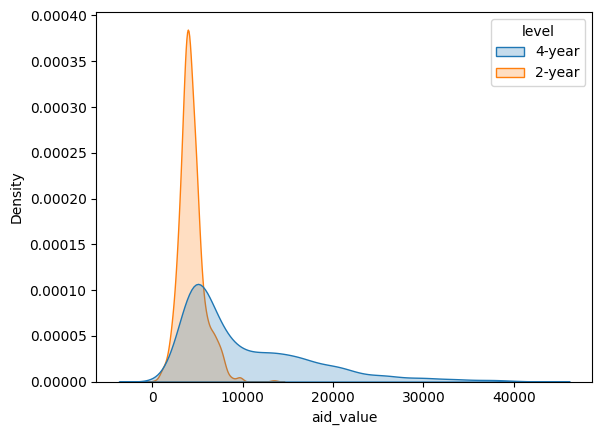

In [63]:
sns.kdeplot(data=ccdata, x="aid_value", hue="level", common_norm=False, fill=True)


<Axes: xlabel='aid_value', ylabel='Density'>

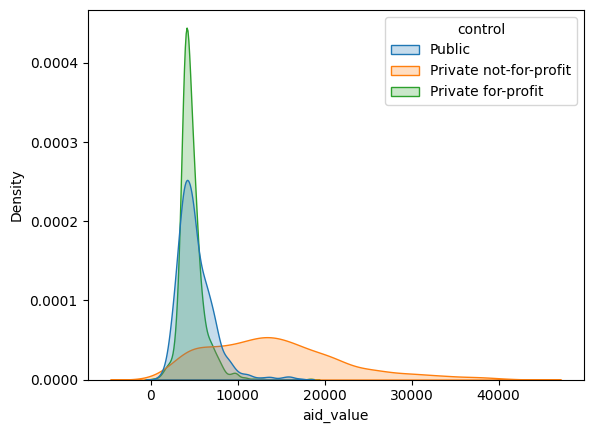

In [64]:
sns.kdeplot(data=ccdata, x="aid_value", hue="control", common_norm=False, fill=True)


In [65]:
ccdata['aid_value'].describe()

count     3797.000000
mean      7960.445878
std       6419.658196
min        294.000000
25%       4018.000000
50%       5207.000000
75%       9343.000000
max      41580.000000
Name: aid_value, dtype: float64

In [66]:
ccdata.groupby('control')['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

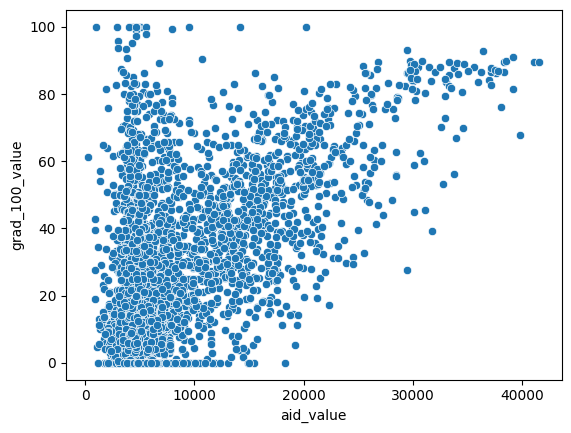

In [67]:
sns.scatterplot(data=ccdata, x='aid_value', y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

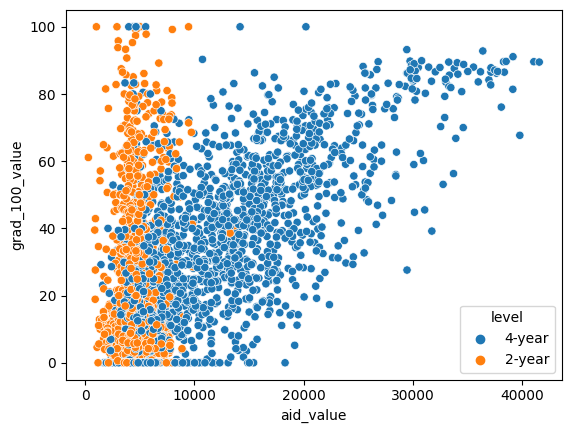

In [68]:
sns.scatterplot(data=ccdata, x='aid_value', y='grad_100_value', hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

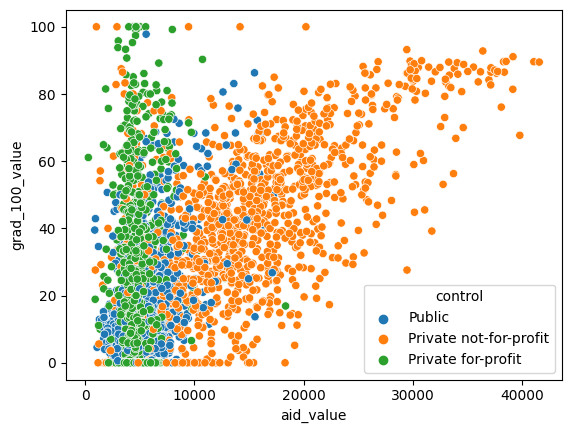

In [69]:
sns.scatterplot(data=ccdata, x='aid_value', y='grad_100_value', hue='control')

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.